<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MLP" data-toc-modified-id="MLP-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MLP</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#MLP-Implementation" data-toc-modified-id="MLP-Implementation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>MLP Implementation</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# MLP

Implement a class that builds an MLP with both variable depth D (number of layers) and
variable number of neurons n_i

for each layer i = 1, ..., D. Produce outputs on the ZIP Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Imports

In [216]:
#import data
zip_train = "zip.train"
zip_test = "zip.test"
df_zip_train = pd.read_csv('zip/'+zip_train, sep=' ',header=None)
df_zip_train = df_zip_train[df_zip_train.columns[:-1]]

y_zip = df_zip_train[df_zip_train.columns[0]]
X_zip = df_zip_train[df_zip_train.columns[1:]]

df_zip_test = pd.read_csv('zip/'+zip_test, sep=' ',header=None)
df_zip_test = df_zip_test[df_zip_test.columns[:-1]]

y_zip = (y_zip.astype(int))



## Data Exploration

In [217]:
def plotNum(num):
    fig, ax = plt.subplots()
    min_val, max_val = -1, 1
    intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
    ax.matshow(num, cmap=plt.cm.Blues)
    plt.show()

In [218]:
np.unique(y_zip)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [243]:
y_zip_exp = np.zeros(shape = (len(y_zip), 10))
y_zip_exp[np.arange(len(y_zip)), y_zip.astype(int)] = 1
y_zip = y_zip_exp

In [244]:
y_zip

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Let's inspect the training data

6.0


5.0


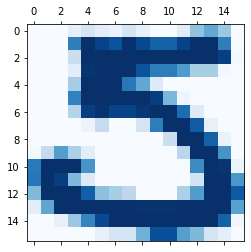

4.0


7.0


3.0


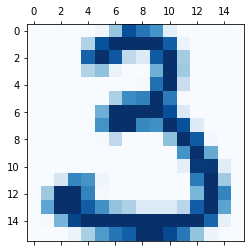

6.0


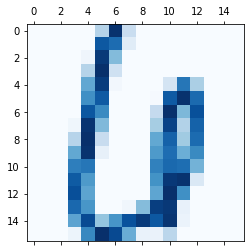

3.0


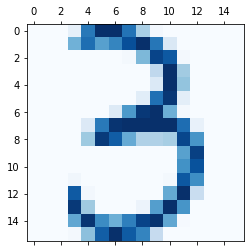

1.0


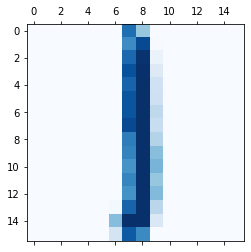

0.0


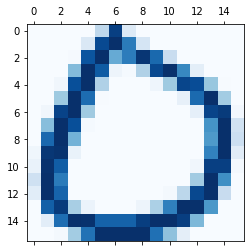

1.0


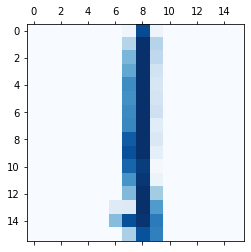

7.0


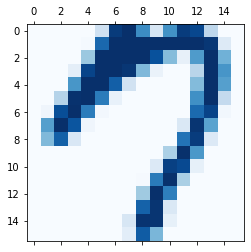

0.0


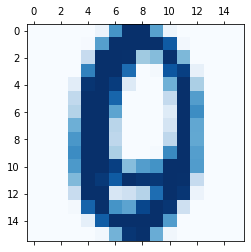

1.0


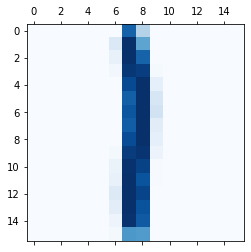

1.0


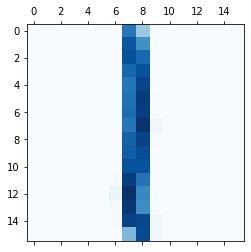

7.0


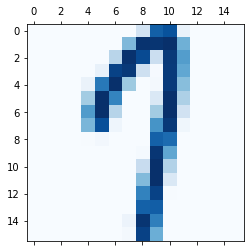

7.0


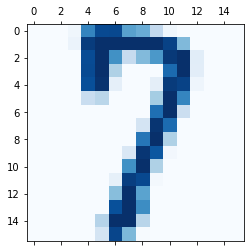

4.0


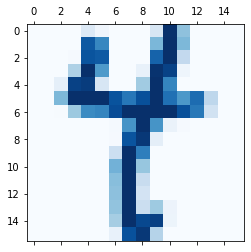

8.0


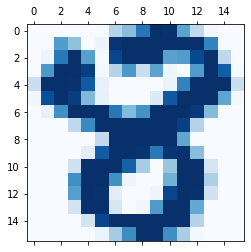

0.0


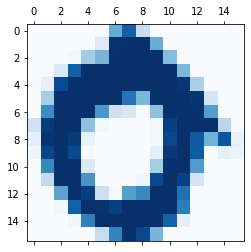

1.0


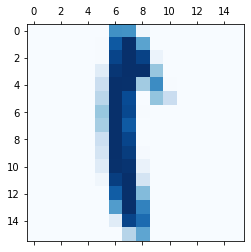

In [8]:
for i in range(20):
    print(df_zip_train.iloc[i][0])
    plotNum(df_zip_train.iloc[i][1:].to_numpy().reshape([16,16]))

In [9]:
from sklearn.metrics import log_loss as ll

from tqdm import trange


In [278]:
#https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9

def iterate_minibatches(X, y, batchsize, shuffle=False):
    assert len(X) == len(y)
    if shuffle:
        indices = np.random.permutation(len(X))
    for start_idx in range(0, len(X) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield X[excerpt], y[excerpt]


## MLP Implementation

In [130]:
import math

def maxpos(v): return (v==np.max(v)).astype(int)

def sigmoid(x): return 1 / (1 + np.exp(-x))

def sigmoid_(x): return x * (1 - x) 

def errorfunc(y, y_) : return np.absolute(y-maxpos(y_))

def crosserr(y, y_): return np.sum(y * np.log(y_))

(np.array([1,2,3,4]) == np.array([4,2, 3, 1]))
    

array([False,  True,  True, False])

In [107]:
class Sigmoid():
    def __init__(self):
        # ReLU layer simply applies elementwise rectified linear unit to all inputs
        pass
    
    def forward(self, input):
        # Apply elementwise ReLU to [batch, input_units] matrix
        sigmoid = 1 / (1 + np.exp(-input))
        return sigmoid
    
    def backward(self, input, grad_output, lr):
        # Compute gradient of loss w.r.t. ReLU input
        sigmoid_grad = input+(1-input)
        return grad_output*sigmoid_grad

In [290]:
class Dense():
    def __init__(self, input_units, output_units, theta=1):
        self.theta = theta
        self.weights = np.random.uniform(low=-1.0, high=1.0, size = (input_units,output_units))
        self.biases = np.zeros(output_units)

    def fit(self, X, y):
        Xy = self._merge(X, y)
        #self.weights = self._get_w(Xy)
   
    def forward(self, input_):
        return (np.dot(input_, self.weights) + self.biases)

    def backward(self, input_, d2, lr):
        d1 = np.dot(d2, self.weights.T)
        
        delta_weights = np.dot(input_.T, d2)
        delta_biases = d2.mean(axis=0)*input_.shape[0]
        
        if (self.weights.shape == delta_weights.shape and self.biases.shape == delta_biases.shape):
            self.weights = self.weights - lr * delta_weights
            self.biases = self.biases - lr * delta_biases
        else:
            print("something went wrong, old _weights: {}, new weights: {}".format(self.weights.shape, new_weights.shape))
            print("something went wrong, old _biases: {}, new biases: {}".format(self.biases.shape, new_biases.shape))
        
        return d1
    
    def weights_biases_update(self, new_weights, new_biases):
        if (self.weights.shape == new_weights.shape and self.biases.shape == new_biases.shape):
            self.weights = new_weights
            self.biases = new_biases
        else:
            print("something went wrong, old _weights: {}, new weights: {}".format(self.weights.shape, new_weights.shape))
            print("something went wrong, old _biases: {}, new biases: {}".format(self.biases.shape, new_biases.shape))
    
        

class MLP():
    def __init__(self, input_size, hidden_size, output_size, depth, theta = 1):
        self.network = []
        if (depth<2):
            print("Depth of MLP must be at least 2")
            return 1
        self.network.append(Dense(input_units = input_size, output_units = hidden_size, theta = theta ))
        self.network.append(Sigmoid())
        for i in range(depth-2):
            self.network.append(Dense(input_units = hidden_size, output_units = hidden_size, theta = theta))
            self.network.append(Sigmoid())
        #last layer
        self.network.append(Dense(input_units = hidden_size, output_units = output_size, theta = theta))

    def forward(self, X):
        activations = []
        input_ = X
        # Looping through each layer
        for l in self.network:
            activations.append(l.forward(input_))
            # Updating input to last layer output
            input_ = activations[-1]
        assert len(activations) == len(self.network)
        return activations
    
    def single_predict(self,X):
        logits = self.forward(X)[-1]
        return maxpos(logits)
    
    def predict(self, all_X):
        pred  = np.zeros(shape = (all_X.shape[0], 10))
        for i in range(all_X.shape[0]):
            X = np.expand_dims(all_X[i], axis = 0)
            pred[i:] = (self.single_predict(X))
        return np.array(pred)
    
    def backward(self, X, y, activations, lr):
        error = loss(activations[-1], y)
        #print(X.shape)
        activations = [X] + activations
        #activations.append(error)
        
        #d1 = activations[-1] * sigmoid_(activations[-2])
        #d1 = error
        l1 = crossentropy(activations[-1],y)
        d1 = grad_crossentropy(activations[-1],y)
        for i in reversed(range(0, len(self.network))):
           d1 = self.network[i].backward(activations[i], d1, lr)
    
    def single_fit(self, X, y, lr):
        activations = self.forward(X)
        err = loss(activations[-1], y)
        self.backward(X,y,activations, lr)
        return err
    
    def fit(self, all_X, all_y, batchsize, epochs, lr = 1e-4, shuffle = False):
        epes = []
        for i in range(epochs):
            eperror = []
            for xb,yb in iterate_minibatches(all_X, all_y, batchsize, shuffle):
                err = self.single_fit(xb, yb, lr)
                eperror.append(err)
            epe = np.mean(eperror)
            acc = self.accuracy(all_X, all_y)
            #print("epoch: {}, training_error: {}, accuracy: {}".format(i, epe, acc[0]))
            epes.append(epe)
            
        return epes
    
    def accuracy(self, all_X, all_y):
        y_pred = self.predict(all_X)
        #true_answers_in_batch = y_pred[np.arange(len(y_pred)),all_y.astype(int)]
        true_answers_in_batch = np.all(y_pred==all_y, axis = 1).astype(int)
        return sum(true_answers_in_batch)/len(true_answers_in_batch), true_answers_in_batch

        

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_zip.to_numpy(), y_zip, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(5832, 256)
(5832, 10)


In [292]:
def run_mlp(X_train, y_train, X_test, y_test, 
           input_size,
           hidden_size,
           output_size,
           depth,
           theta,
           epochs,
           batchsize,
           lr,
           shuffle,
           plot_axis):
    net = MLP(input_size,
           hidden_size,
           output_size,
           depth,
           theta)
    print(epochs)
    errors = net.fit(all_X=X_train, all_y=y_train, epochs=epochs, batchsize= batchsize, lr=lr, shuffle=shuffle)
    test_accuracy = net.accuracy(X_test, y_test)[0]
    
    plot_axis.plot(errors)
    plot_axis.set_title('#hidd: {}, depth:{}, acc: {}'.format(hidden_size, depth, test_accuracy))
    return net, errors, test_accuracy
    

size: 4, depth: 2
200
size: 4, depth: 3
200
size: 4, depth: 4
200
size: 8, depth: 2
200
size: 8, depth: 3
200
size: 8, depth: 4
200
size: 12, depth: 2
200
size: 12, depth: 3
200
size: 12, depth: 4
200
size: 16, depth: 2
200
size: 16, depth: 3
200
size: 16, depth: 4
200
size: 20, depth: 2
200
size: 20, depth: 3
200
size: 20, depth: 4
200


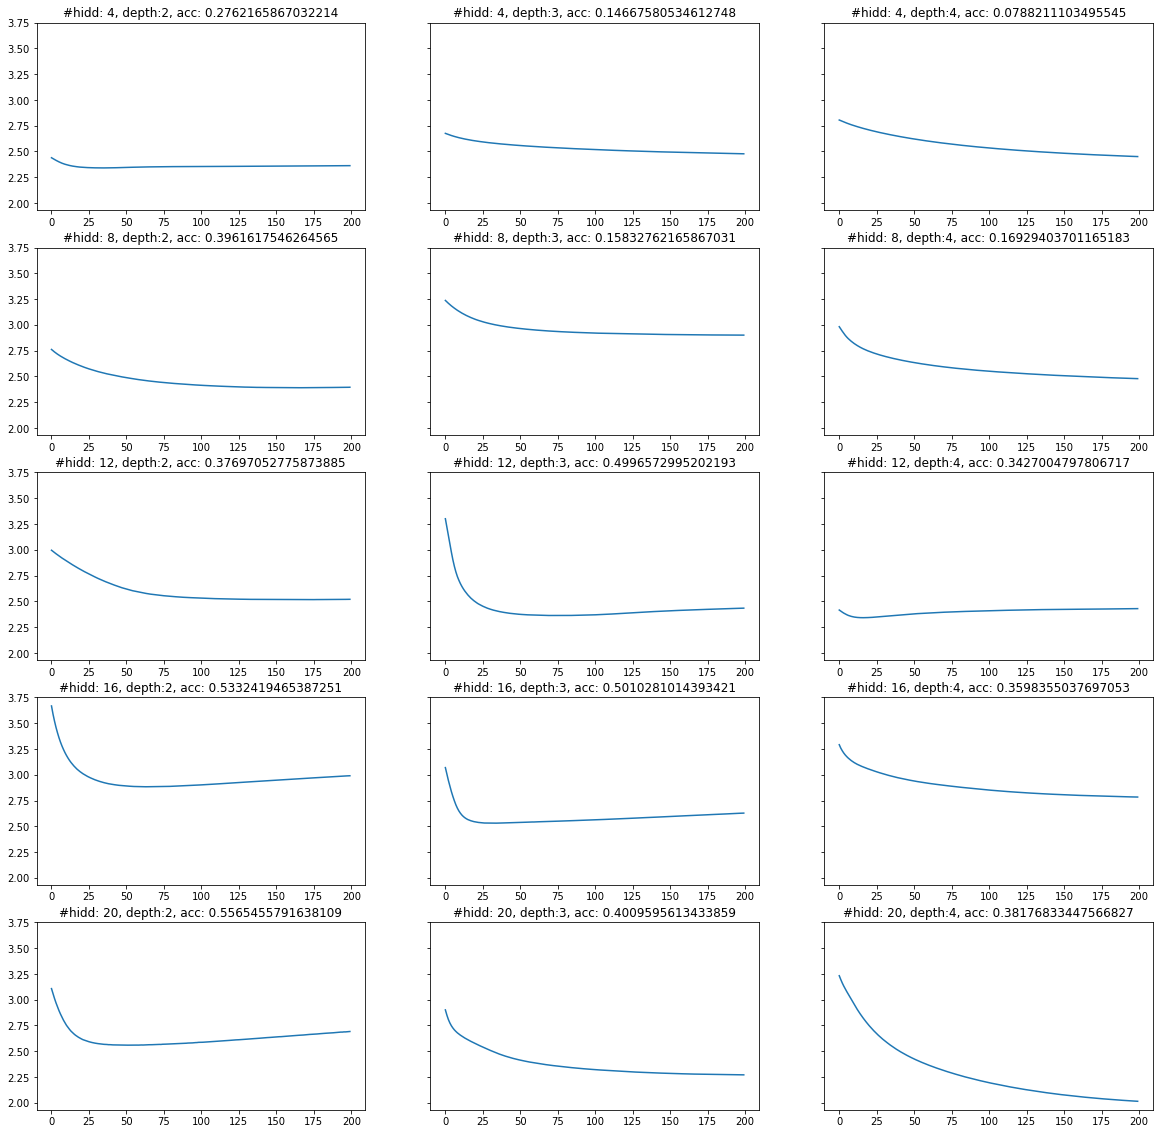

In [295]:
hidden_sizes = [4,8,12,16,20]
depth = [2,3,4]
#fixed: lr = 1e-4, epochs = 100, batchsize = 64
f, axs = plt.subplots(5, 3, figsize=(20,20), sharey= True)
networks = []
errors = []
test_accuracy = []

for i, s in enumerate(hidden_sizes):
    for j, d in enumerate(depth):
        print("size: {}, depth: {}".format(s,d))
        n, e, a = run_mlp(X_train, y_train, X_test, y_test, 
           input_size = 256,
           hidden_size = s,
           output_size = 10,
           depth = d,
           theta = 1,
           epochs = 200,
           batchsize = 64,
           lr = 1e-4,
           shuffle = True,
           plot_axis = axs[i,j])
        networks.append(n)
        errors.append(e)
        test_accuracy.append(a)
        
            

In [300]:
def plotweights(weights ):
    for i in range(weights.shape[1]):
    #print(weights.iloc[i][0])
        plotNum(weights[:,i].reshape([16,16]))

In [301]:
net = networks[-1]
weights = net.network[0].weights
weights.shape

(256, 20)

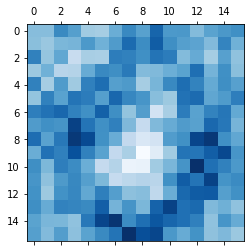

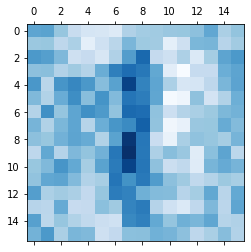

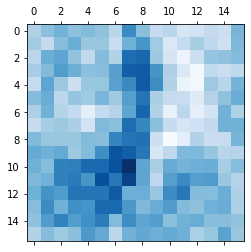

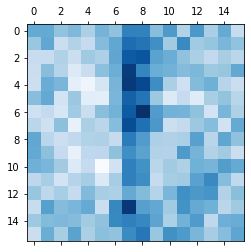

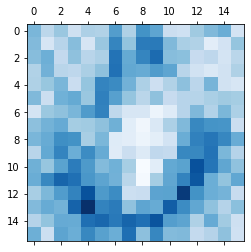

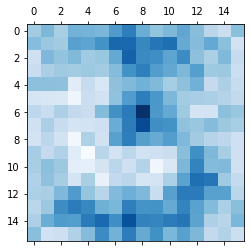

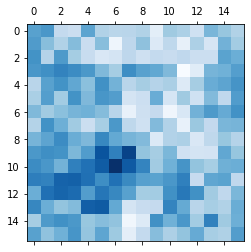

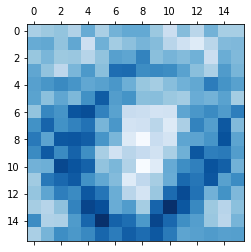

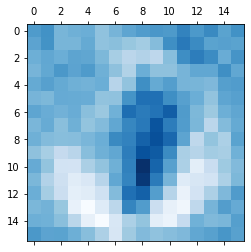

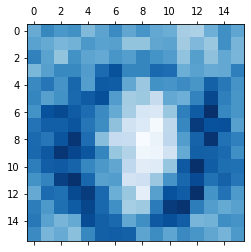

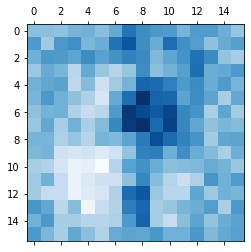

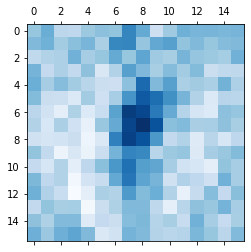

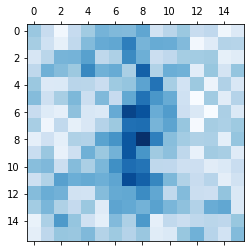

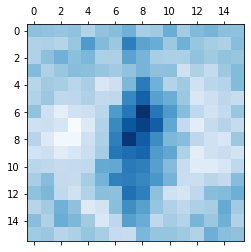

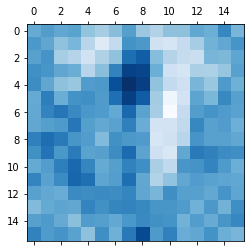

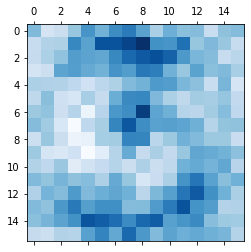

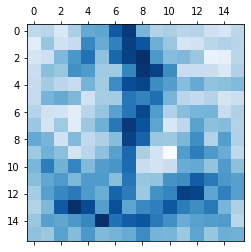

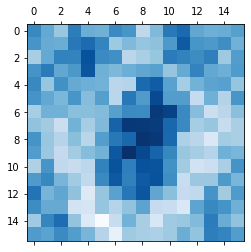

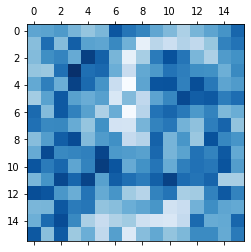

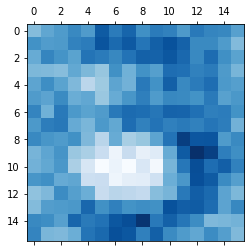

In [302]:
plotweights(weights)

0.5586017820424949


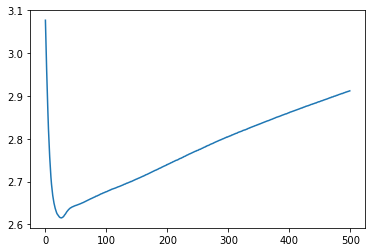

In [306]:
#use parameters with best lost curve
#ext_network = MLP(input_size = 256, hidden_size = 20, output_size = 10, depth = 4, theta = 1)
#ext_errors = ext_network.fit(X_train, y_train, epochs = 500, batchsize = 64, lr = 1e-4, shuffle = True)

#ext_acc, true_preds = ext_network.accuracy(X_test, y_test)
print(ext_acc)
plt.plot(ext_errors)

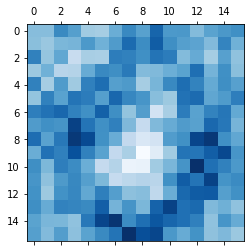

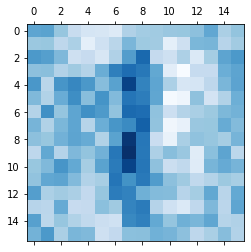

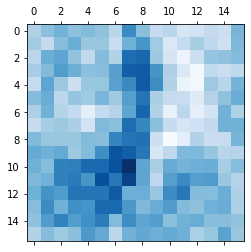

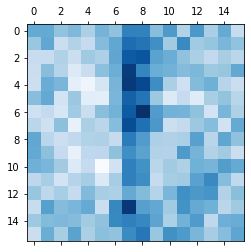

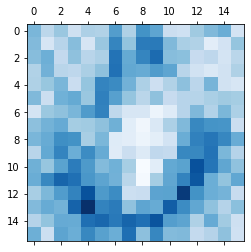

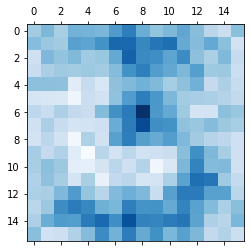

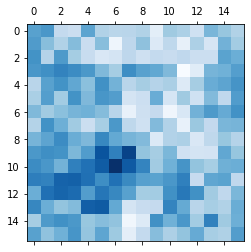

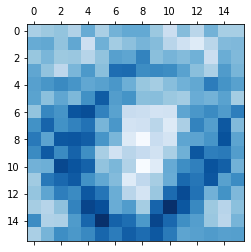

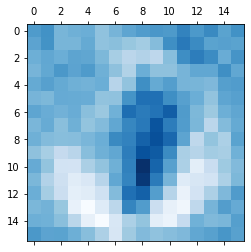

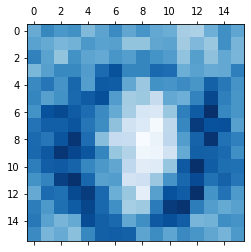

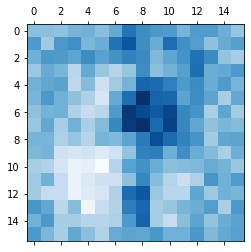

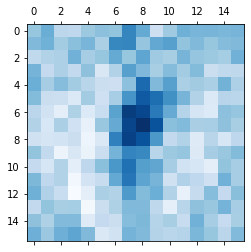

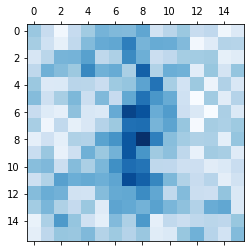

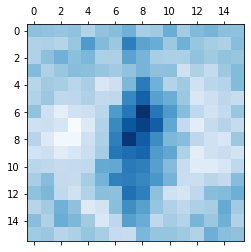

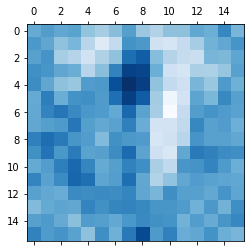

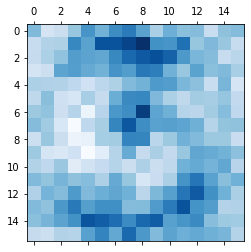

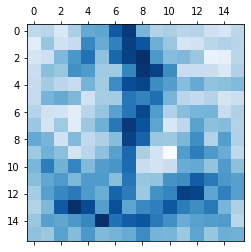

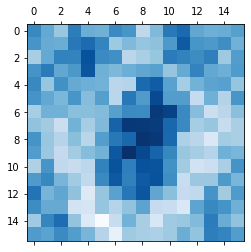

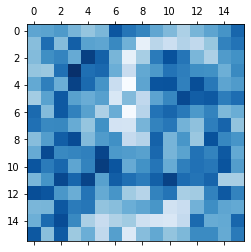

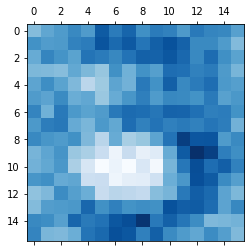

In [307]:
ext_weights = ext_network.network[0].weights
plotweights(weights)

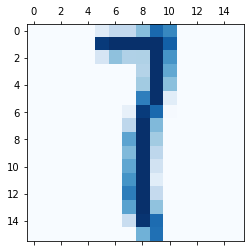

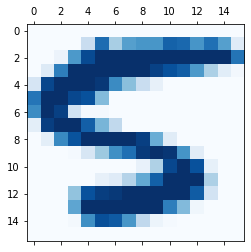

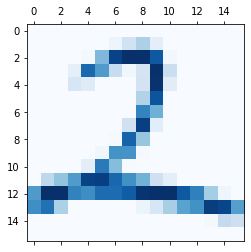

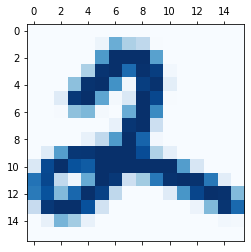

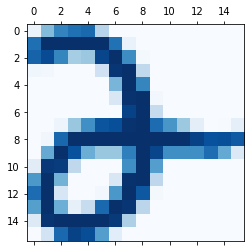

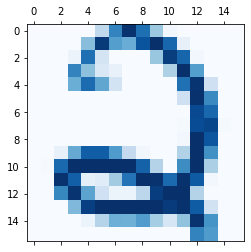

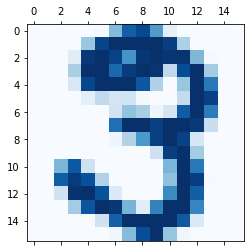

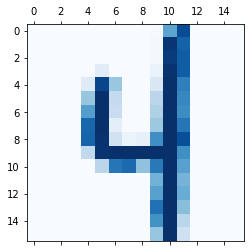

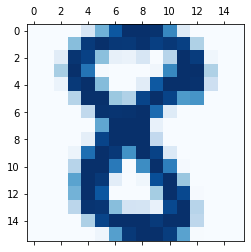

In [330]:
#incorrectly classified:
testsampleX = X_test[0:20]
testsampley = y_test[0:20]

acc, true_preds_sample = ext_network.accuracy(testsampleX, testsampley)

false_pred_sample = testsampleX[(np.logical_not(true_preds_sample))]

for i in range((false_pred_sample).shape[0]):
    plotNum(false_pred_sample[i].reshape([16,16]))